In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score


%matplotlib inline

In [469]:
df = pd.read_csv("../DATA/vgsales.csv")

In [470]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [472]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [473]:
df=df.dropna()

In [474]:
df.drop(df[df['Year'] >= 2016].index, inplace=True)

In [475]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [476]:
Na_sales = df["NA_Sales"].sum()
EU_sales = df["EU_Sales"].sum()
JP_sales = df["JP_Sales"].sum()
Other_sales = df["Other_Sales"].sum()
Global_sales = df["Global_Sales"].sum()

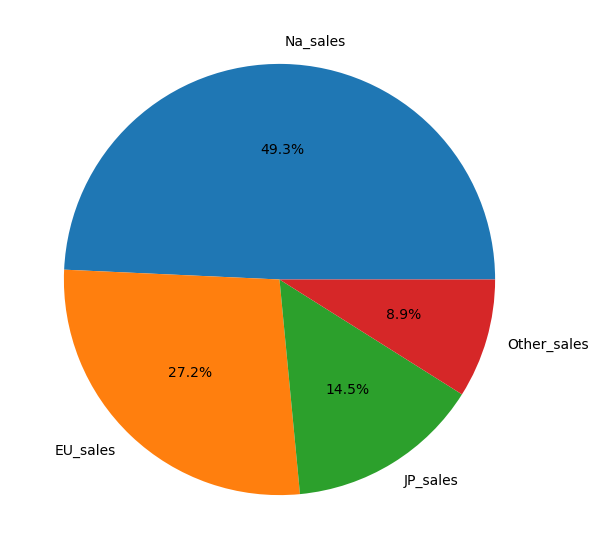

In [477]:
sales = [Na_sales,EU_sales, JP_sales, Other_sales]
labels = ["Na_sales", "EU_sales", "JP_sales", "Other_sales"]
fig = plt.figure(figsize=(10, 7))
plt.pie(sales, labels=labels,autopct='%1.1f%%')
 
# show plot
plt.show()

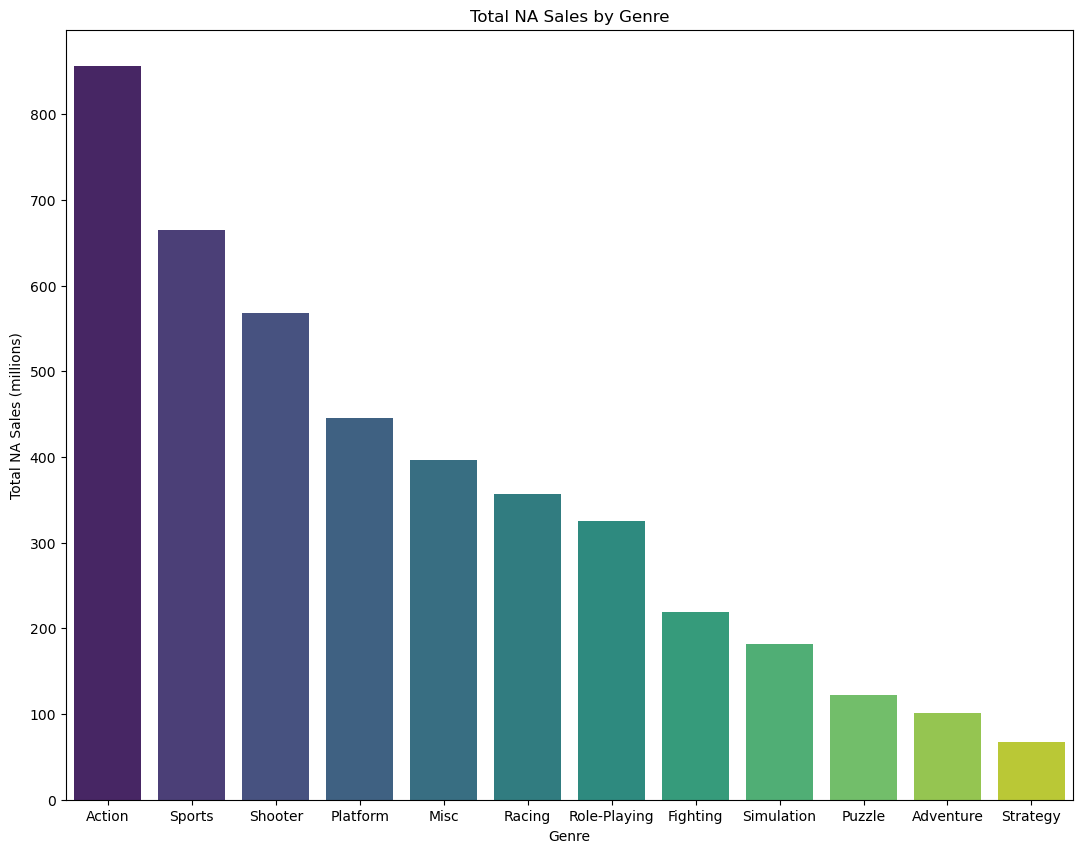

In [478]:
genre_sales = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
genre_sales_df = pd.DataFrame(genre_sales).reset_index()
plt.figure(figsize=(13, 10))
sns.barplot(x='Genre', y='NA_Sales', data=genre_sales_df, palette='viridis')
plt.title('Total NA Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total NA Sales (millions)')
plt.show()

In [479]:
filtered_df = df[(df['Year'] >= 1980) & (df['Year'] <= 2015) & (df['Genre'] == 'Action')]


action_games_count = filtered_df.groupby('Year').size()


average_action_games = action_games_count.mean()

print("Average number of action games from 1980 to 2015 per year:", average_action_games)

Average number of action games from 1980 to 2015 per year: 87.0


In [480]:
filtered_df = df[(df['Year'] >= 1980) & (df['Year'] <= 2015) & (df['Genre'] == 'Action')]


action_games_sales = filtered_df.groupby('Year')['Global_Sales'].sum()


average_action_games_sales = action_games_sales.mean()

print("Average global sales of action games from 1980 to 2015 per year:", average_action_games_sales)


Average global sales of action games from 1980 to 2015 per year: 47.30361111111111


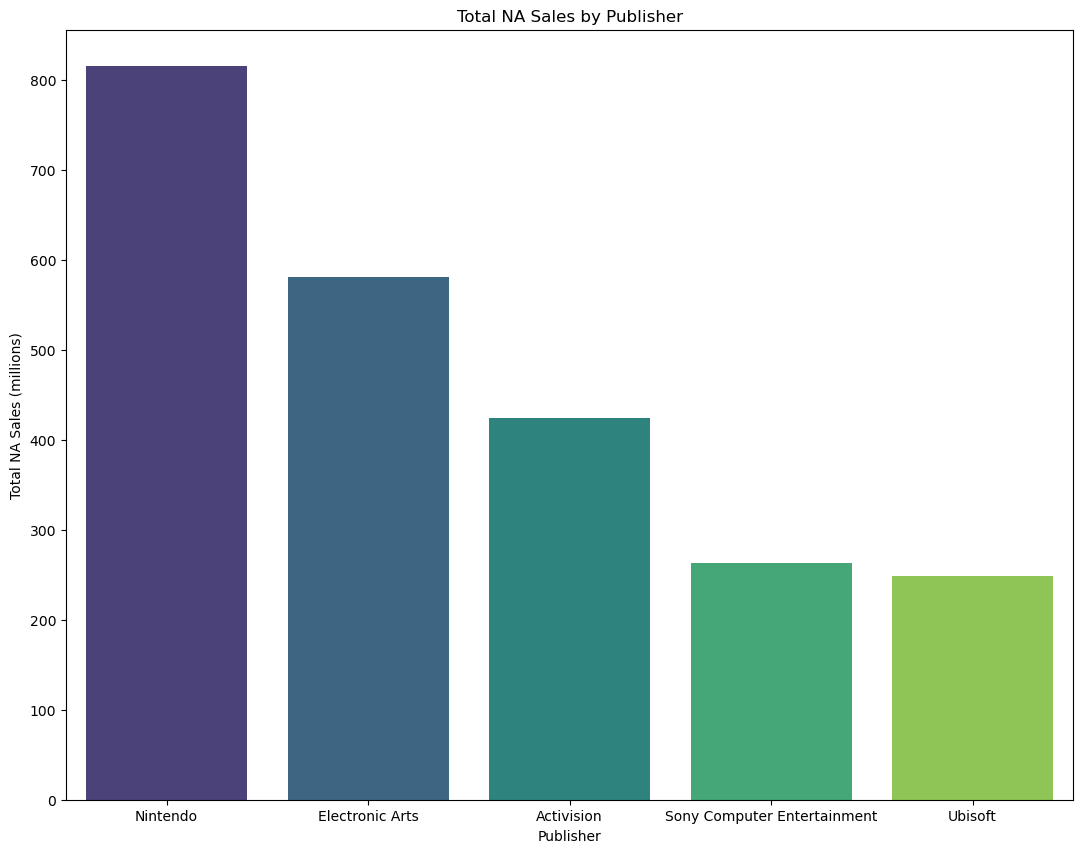

In [481]:
publisher_sales = df.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False).head(5)
publisher_sales_df = pd.DataFrame(publisher_sales).reset_index()
plt.figure(figsize=(13, 10))
sns.barplot(x='Publisher', y='NA_Sales', data=publisher_sales_df, palette='viridis')
plt.title('Total NA Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Total NA Sales (millions)')
plt.show()

C:\Users\terri\AppData\Local\Temp\ipykernel_25864\1485194285.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=year_genre_sales, x='Year', y='NA_Sales', palette='viridis')


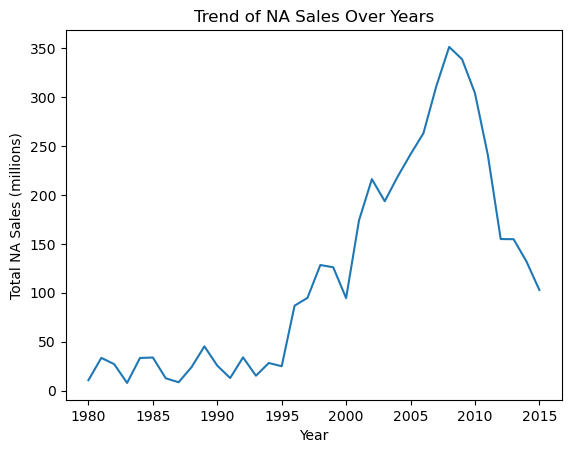

In [482]:
year_genre_sales = df.groupby('Year')['NA_Sales'].sum().reset_index()
sns.lineplot(data=year_genre_sales, x='Year', y='NA_Sales', palette='viridis')
plt.title('Trend of NA Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total NA Sales (millions)')
plt.show()

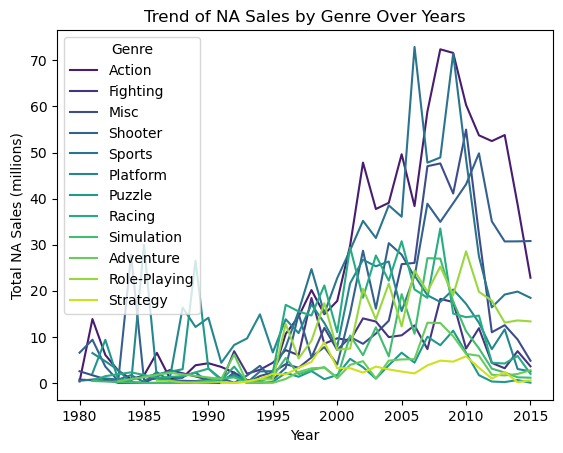

In [483]:
year_genre_sales = df.groupby(['Year', 'Genre'])['NA_Sales'].sum().reset_index()
sns.lineplot(data=year_genre_sales, x='Year', y='NA_Sales', hue='Genre', palette='viridis')
plt.title('Trend of NA Sales by Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Total NA Sales (millions)')
plt.show()

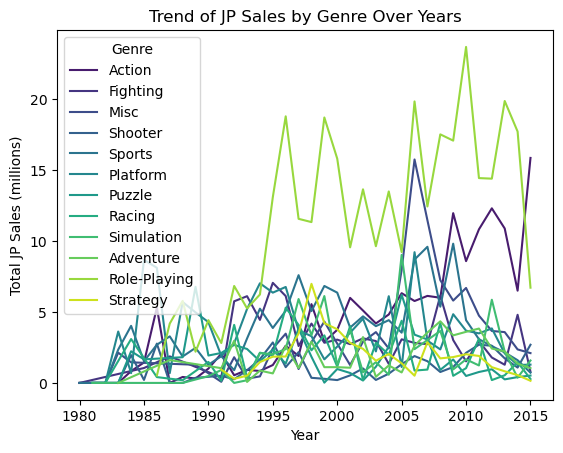

In [484]:
year_genre_sales = df.groupby(['Year', 'Genre'])['JP_Sales'].sum().reset_index()
sns.lineplot(data=year_genre_sales, x='Year', y='JP_Sales', hue='Genre', palette='viridis')
plt.title('Trend of JP Sales by Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Total JP Sales (millions)')
plt.show()

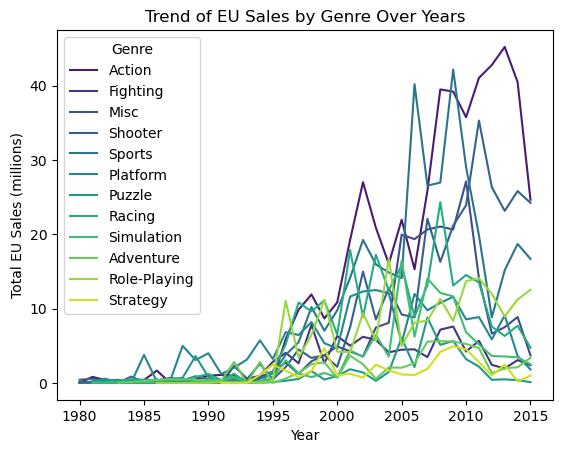

In [485]:
year_genre_sales = df.groupby(['Year', 'Genre'])['EU_Sales'].sum().reset_index()
sns.lineplot(data=year_genre_sales, x='Year', y='EU_Sales', hue='Genre', palette='viridis')
plt.title('Trend of EU Sales by Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Total EU Sales (millions)')
plt.show()

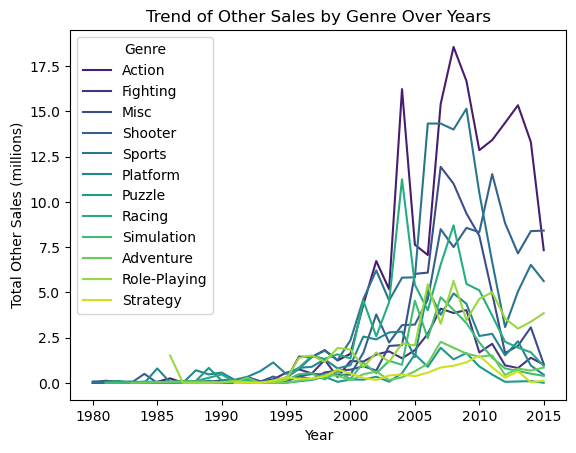

In [486]:
year_genre_sales = df.groupby(['Year', 'Genre'])['Other_Sales'].sum().reset_index()
sns.lineplot(data=year_genre_sales, x='Year', y='Other_Sales', hue='Genre', palette='viridis')
plt.title('Trend of Other Sales by Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Total Other Sales (millions)')
plt.show()

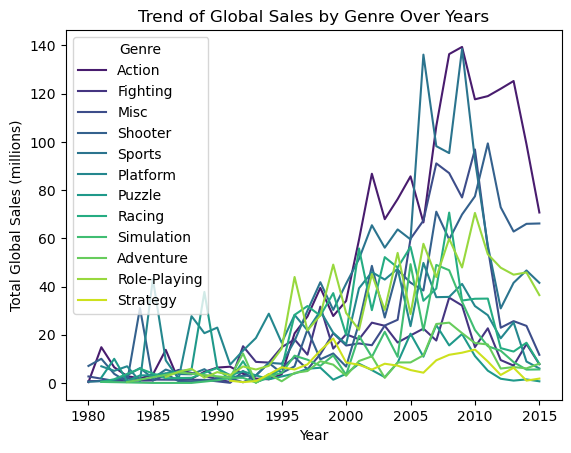

In [487]:
year_genre_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
sns.lineplot(data=year_genre_sales, x='Year', y='Global_Sales', hue='Genre', palette='viridis')
plt.title('Trend of Global Sales by Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (millions)')
plt.show()

In [488]:
columns_to_drop = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

df.drop(columns_to_drop, axis=1, inplace=True)

In [489]:
counts = df['Publisher'].value_counts()

df['Publisher'] = df['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

In [490]:
onehot_columns = ['Platform', 'Genre', 'Publisher']
def onehot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df
df =  onehot_encode(df, onehot_columns)

In [491]:
df

,Rank,Year,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,...,SquareSoft,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Virgin Interactive,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
0,1,2006.0,82.74,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1985.0,40.24,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,2008.0,35.82,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,2009.0,33.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,1996.0,31.37,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,2002.0,0.01,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
16594,16597,2003.0,0.01,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16595,16598,2008.0,0.01,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16596,16599,2010.0,0.01,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [870]:
y = df['Global_Sales']
X = df.drop('Global_Sales', axis=1)

In [871]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [872]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [873]:
def r2_score(y_true, y_pred):
    
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())
    return r2

In [874]:
model = Sequential()



# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='mse', optimizer=optimizer,metrics=[r2_score])

In [875]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2.1198 - r2_score: 0.0268 - val_loss: 2.7613 - val_r2_score: 0.1051
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2178 - r2_score: 0.1392 - val_loss: 2.6390 - val_r2_score: 0.1718
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4734 - r2_score: 0.2213 - val_loss: 2.6040 - val_r2_score: 0.1937
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6441 - r2_score: 0.2412 - val_loss: 2.5943 - val_r2_score: 0.1997
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6489 - r2_score: 0.2389 - val_loss: 2.5850 - val_r2_score: 0.2054
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5096 - r2_score: 0.2473 - val_loss: 2.5808 - val_r2_score: 0.2079
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3955 - r2_score: 0.2189 - val_loss: 2.5788 - val_r2_score: 0.2092
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3592 - r2_score: 0.2335 - val_loss: 2.5776 - val_r2_score

In [876]:
model.save('full_data_project_model.h5')  

<Axes: >

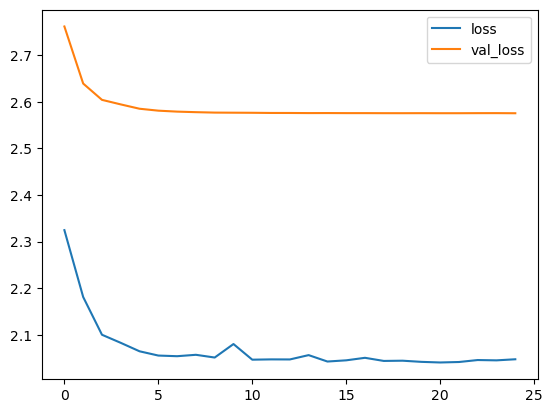

In [877]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [878]:
test_loss, test_r2 = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test R^2 Score: {test_r2}')

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5913 - r2_score: 0.4672
Test Loss: 2.495873212814331
Test R^2 Score: 0.45304715633392334


In [879]:
new_game = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)


new_game['Action'] = 1


new_game_scaled = scaler.transform(new_game)
predicted_sales = model.predict(new_game_scaled)

print("Predicted sales for the new action game:", predicted_sales)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted sales for the new action game: [[0.85188365]]


In [880]:
new_game = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)


new_game['Sports'] = 1


new_game_scaled = scaler.transform(new_game)
predicted_sales = model.predict(new_game_scaled)

print("Predicted sales for the new sports game:", predicted_sales)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted sales for the new sports game: [[0.826361]]


In [881]:
new_game = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)


new_game['Shooter'] = 1


new_game_scaled = scaler.transform(new_game)
predicted_sales = model.predict(new_game_scaled)

print("Predicted sales for the new shooter game:", predicted_sales)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted sales for the new shooter game: [[0.8252289]]


In [882]:
new_game = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)


new_game['Platform'] = 1


new_game_scaled = scaler.transform(new_game)
predicted_sales = model.predict(new_game_scaled)

print("Predicted sales for the new platform game:", predicted_sales)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted sales for the new platform game: [[0.8857487]]


In [883]:
new_game = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)


new_game['Misc'] = 1


new_game_scaled = scaler.transform(new_game)
predicted_sales = model.predict(new_game_scaled)

print("Predicted sales for the new misc game:", predicted_sales)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted sales for the new misc game: [[0.8569726]]


In [884]:
num_action_games = 80  


new_games = pd.DataFrame(np.zeros((num_action_games, len(X.columns))), columns=X.columns)


new_games['Action'] = 1
new_games['PC'] = 1
new_games['Activision'] = 1

new_games_scaled = scaler.transform(new_games)


predicted_sales = model.predict(new_games_scaled)


total_predicted_sales = np.sum(predicted_sales)

print("Total predicted sales for action games for the next year:", total_predicted_sales)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Total predicted sales for action games for the next year: 69.02957
